# *Auxiliar 2:* Redes Neuronales


## 📚 Objetivos de la clase 📚

La clase auxiliar de esta semana tendrá varios objetivos:

- Introducir PyTorch, un Framework para trabajar con Deep Learning
- Definir y explicar el concepto de Tensor.
- Explicar el uso de GPU en Deep Learning.
- Explicar el cálculo de derivadas con PyTorch.
- Construir un una red Feed Forward

# **PyTorch**

<!-- Tomar en consideracion que los chicos no han visto nada practico en deep learning. No se les explicaron cosas como optimizers, schedulers, etc asi que hay que ser pedagogicos.

* Motivacion, trabajo con tensores, dimensionalidad alta, optimizacion en gpu, utilidad de computo por batch (eficiencia, robustez del modelo, etc)


* introducir la api, las operaciones basicas, operaciones de creacion, operaciones inplace, cambiar la forma de los tensores, etc

* mostrar el uso de la gpu con ejemplos (mostrar nvidia-smi), revisar codigo agnostico al dispositivo -->


------------------------------------------------------
Ahora vamos a introducir PyTorch, un framework para hacer Deep Learning, y también mostrar dos aplicaciones. Esta herramienta va a ser usada de aquí hasta el final del curso, así que es importante que tengan un conocimiento base sobre este framework.

## **¿Qué es PyTorch exactamente?**

PyTorch es un framework para hacer Deep Learning. Las características principales que ofrece son:

- Operaciones básicas con **tensores**.
- Usar fácilmente y de forma transparente la **GPU**, si es que existe.
- Utilidades ya implementadas para acelerar el desarrollo de **redes neuronales**. Capas lineales, capas recurrentes, capas convolucionales, funciones de activación, funciones de pérdida, etc.
- Motor de **diferenciación y propagación de gradientes automático**. Se guarda un registro de las operaciones que se realizan sobre un tensor y luego se puede calcular automáticamente la derivada de un tensor de salida con respecto a los parámetros que estuvieron involucrados es un cálculo.

<!-- Como les decia, PyTorch es un framework para hacer deep learning. Las caracteristicas principales de un framework de este tipo es que permite trabajar y realizar operaciones basicas con tensores (abajo explicamos que son y por qué nos interesan), permite usar facilmente y de forma transparente la GPU, si es que existe (mas delante explicamos por que querriamos hacer esto)  y tambien viene con varias utilidades ya implementadas para acelerar el desarrollo de redes neuronales. Por ejemplo, viene con varios modulos de redes neuronales, como capas lineales (como las que vieron en clases), capas recurrentes, capas convulocionales (estas se ven mas adelante), funciones de activacion, funciones de perdida, etc. Finalmente, y quiza lo mas importante del framework, es que viene con un motor de diferenciacion y propagacion de gradientes automatico, es decir, se guarda un registro de las operaciones que se realizan sobre un tensor y luego se puede calcular automaticamente la derivada de un tensor de salida con respecto a los parametros que estuvieron involucrados en su calculo.

-->


## **¿Qué es un tensor?**

Un tensor es una estructura matemática para organizar datos. De toda la vida hemos sabido lo que es un **número**. En álgebra lineal vimos que podemos organizar (de forma indexada) varios números en lo que llamamos **vector**, y luego extendimos esta organización a una estructura bidimensional, una **matriz**, con filas y columnas.

Los **tensores** son una forma de generalizar esta idea. Decimos que un numero wacho es un tensor de 0 dimensiones, un **vector** es un tensor de **1 dimensión** y una **matriz** es un tensor de **2 dimensiones**. Este concepto nos permite generalizar esta organización de los datos sobre dimensiones mayores. Podemos hablar, por ejemplo, de un **cubo** (un tensor de 3 dimensiones), que se podría interpretar como varias matrices apiladas, o más generalmente un **tensor de N dimensiones** donde N es un número cualquiera (entre mas grande N mas difícil de imaginar :D).

Los tensores de dimensiones mayores se los pueden imaginar como listas, donde sus elementos son tensores de dimensiones menores. Esto lo pueden ver en la siguiente fotaza:

(source: knoldus)

![visualizacion tensor](https://macrosynergy.com/wp-content/uploads/2019/08/Tensor_01.jpg)

## **¿Por qué me interesan los tensores?**

Cuando uno trabaja en Deep Learning, es muy común encontrarse con datos de **alta dimensionalidad**.

En **NLP** por ejemplo, vimos que es útil representar una **palabra** como un **vector** que captura información de la palabra, ya sea de su contexto, de los caracteres que contiene, etc.

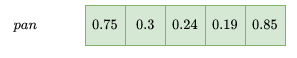

Tomando esto en cuenta, vemos que una lista de palabras (una frase) la podemos representar como una **matriz**. A estas alturas ya tenemos un **tensor de 2 dimensiones**

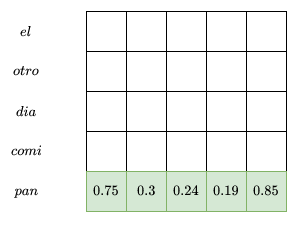

¿Qué pasa si por alguna razón queremos operar sobre varias frases a la vez? ¿Qué pasa si tenemos una lista de frases? Bueno, ahora tenemos un "cubo", un tensor de 3 dimensiones, donde la primera dimensiones corresponde a cada frase dentro del conjunto, la segunda a cada palabra dentro de la frase y finalmente la tercera a cada una las posiciones dentro del vector de embeddings.

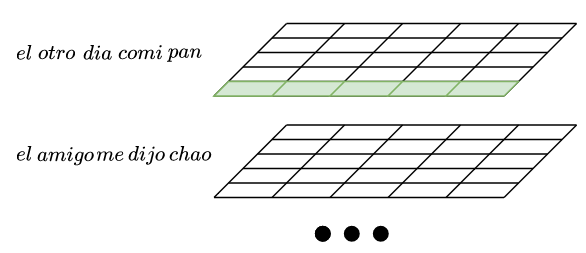

Esto se repite en muchas más áreas, por ejemplo una imagen RGB es un tensor de 3 dimensiones, un video, donde hay una lista de imágenes se puede interpretar como un tensor de 4 dimensiones, y así.

Analizar **varios elementos a la vez** es una práctica común en Deep Learning. Esto hace que el manejo de **tensores** se vuelva importante debido a que normalmente aumentamos en uno el número de dimensiones de los ejemplos al hacer esto.

## **Mini-Batches y entrenamiento**

En clases se vio que la forma en la que se entrenan las redes neuronales es un **proceso iterativo**, donde en primer lugar se realiza una **predicción que es mala**, **se calcula una función de perdida**, **para cada parámetro se calcula el gradiente de la _loss_ con respecto a este parámetro** y luego **se desciende en la dirección de este gradiente para tratar de llevar los parámetros a los valores que minimizan la función de perdida**.

Si este proceso iterativo se llevara a cabo de a un ejemplo a la vez, el valor de **la _loss_ sería muy dependiente del ejemplo concreto que se acaba de observar** y podría no ser representativo de la _loss_ general. Esto resulta en actualizaciones ruidosas de los parámetros, porque la _loss_ para el siguiente ejemplo puede ser muy distinta al valor anterior y así es como los parámetros pueden oscilar y tener dificultad para converger.

Acá es donde nos viene a rescatar el concepto de **_mini-batch_**. Un **Mini-Batch** es un **pequeño subconjunto aleatorio de muestras** de los datos de entrenamiento. Los ejemplos se pasan por la red en **grupos pequeños** para que cada conjunto produzca una  **_loss_ más representativa**. Esto le agrega robustez al modelo y lo **ayuda a converger**. El tamaño del _mini-batch_ (cantidad de ejemplos que se pasan a la vez) se vuelve un hiper parámetro de la red. Los valores óptimos de tamaño de _mini-batch_ pueden variar mucho, pero los números que yo he visto varían entre 8 y 32, aunque para algunas aplicaciones he visto valores del orden de 1000.


Pueden leer un poco más [acá](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/) o [acá](https://ruder.io/optimizing-gradient-descent/), la sección introductoria lo explica un poco en más detalle, y cita al libro [Deep Learning](https://www.deeplearningbook.org/), que es muy weno :-)

<br>
<center>
<img src="https://ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif" width=300 height=300 />
</center>
<br>



## **Ejemplos**
La API realmente es muy similar a la de Numpy, así que veremos sólo unos pocos ejemplos. La documentación sobre los tensores la pueden ver [acá](https://pytorch.org/docs/stable/tensors.html) y la documentacion general de las operaciones sobre tensores que ofrece pytorch esta [acá](https://pytorch.org/docs/stable/torch.html).


In [ ]:
# Instalamos portalocker para luego acceder a los datasets de Pytorch
!pip install portalocker

In [ ]:
# Nos aseguramos que pytorch y torchtext esten en la ultima version
!pip install torch -U
!pip install torchtext -U
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201

In [ ]:
# Creacion de un tensor a partir de otra estructura
a = [[2,3,4], [4,5,6]]
t = torch.tensor(a)
print("Desde una lista de listas\n", t)
print("\nDimensiones del tensor\n", t.size())
print("\nNumero de dimensiones del tensor\n", t.dim())

Desde una lista de listas
 tensor([[2, 3, 4],
        [4, 5, 6]])

Dimensiones del tensor
 torch.Size([2, 3])

Numero de dimensiones del tensor
 2


In [ ]:
# Creacion de un tensor "vacio"
t = torch.empty(2,2,3)
print("Tensor vacio\n", t)

Tensor vacio
 tensor([[[-1.8465e-19,  6.5203e-39,  1.2168e-38],
         [-7.2417e-28,  4.8685e-39,  1.1070e-42]],

        [[ 0.0000e+00, -7.3861e-19,  6.5203e-39],
         [ 1.2168e-38, -7.2419e-28,  4.8685e-39]]])


In [ ]:
# Creacion de tensores con puros 1 o puros ceros
t = torch.ones(2,3,4)
# t = torch.zeros(2,3,4,5)
print("Puros unos\n", t) # notar la tercera dimension

Puros unos
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


In [ ]:
# Random sampling
t = torch.empty(3, 2).uniform_() # notar operacion in-place
print("Distribucion uniforme\n", t)

t = torch.randn(2, 3)
print("\nDistribucion normal\n", t)

Distribucion uniforme
 tensor([[0.9918, 0.4996],
        [0.7302, 0.8841],
        [0.1926, 0.4007]])

Distribucion normal
 tensor([[ 1.6411,  0.4343,  2.9653],
        [ 0.0302,  0.9442, -0.8378]])


In [ ]:
# Operaciones matematicas
t = torch.ones(3,4)
print("Operaciones con escalares\n", t + 5)

Operaciones con escalares
 tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


In [ ]:
# Operaciones entre tensores
t1 = torch.ones(2, 3)
t1

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
t2 = torch.ones(2, 3) * 2
print("Operaciones entre tensores\n", t1 + t2)

Operaciones entre tensores
 tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [ ]:
# Tambien se pueden hacer operaciones in-place, se modifica el mismo tensor
t = torch.ones(2,3)
t.add_(1)
print("Suma in-place\n", t)

Suma in-place
 tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [ ]:
# Hay veces que es util reorganizar los datos de un tensor, o agregar
# dimensiones
t = torch.arange(16)
print("Dimensiones de partida\n", t.shape)

t = t.view(-1, 8)
print("\nUsamos el metodo .view() y el -1 para que torch infiera dimensiones\n", t.shape)

t = t.flatten() # Aqui tambien se podria usar .view(-1)
print("\nPodemos volver a aplanar el tensor con .flatten()\n", t.shape)

t = t.view(-1, 4).unsqueeze(1) # tambien podria ser .view(-1, 1, 4)
print("\nPodemos agregar dimensiones sin agregar datos con .unsqueeze()\n", t.shape)

t = t.squeeze()
print("\nCon .squeeze() podemos sacar todas las dimensiones de tamaño 1\n", t.shape)

Dimensiones de partida
 torch.Size([16])

Usamos el metodo .view() y el -1 para que torch infiera dimensiones
 torch.Size([2, 8])

Podemos volver a aplanar el tensor con .flatten()
 torch.Size([16])

Podemos agregar dimensiones sin agregar datos con .unsqueeze()
 torch.Size([4, 1, 4])

Con .squeeze() podemos sacar todas las dimensiones de tamaño 1
 torch.Size([4, 4])


In [ ]:
# Podemos hacer las tipicas sumas
t = torch.randn(5, 10)
# dim = 0 es suma de filas y 1 de columnas
print(f"dim=0: {t.sum(dim=0)}")
print(f"dim=1: {t.sum(dim=1)}")

dim=0: tensor([-5.4360,  2.1242,  0.2690, -0.8965, -2.8480,  3.2426,  1.5706, -0.1483,
        -3.0551, -0.1199])
dim=1: tensor([-1.0036, -4.1648,  4.8650, -2.1981, -2.7957])


In [ ]:
# Tal como con numpy podemos hacer funciones
def softmax(T, dim):
  T = torch.as_tensor(T)
  T = T - torch.max(T)
  deno = torch.exp(T)
  suma = torch.sum(torch.exp(T), dim=dim, keepdim=True)
  output = deno/suma
  return output

In [ ]:
t = torch.randn(5, 32)
softmax(t, dim=1)

tensor([[0.0931, 0.0694, 0.0044, 0.0261, 0.0184, 0.0441, 0.0039, 0.0759, 0.0273,
         0.0090, 0.0969, 0.1145, 0.0402, 0.0402, 0.0065, 0.0084, 0.0050, 0.0049,
         0.0213, 0.0177, 0.0302, 0.0185, 0.0598, 0.0184, 0.0256, 0.0266, 0.0202,
         0.0063, 0.0299, 0.0075, 0.0187, 0.0110],
        [0.1400, 0.0316, 0.0130, 0.0217, 0.0736, 0.0040, 0.0056, 0.0113, 0.0734,
         0.0052, 0.0369, 0.0253, 0.0385, 0.1236, 0.0571, 0.0017, 0.0163, 0.0103,
         0.0111, 0.0050, 0.0039, 0.0126, 0.0291, 0.0074, 0.0742, 0.0138, 0.0443,
         0.0115, 0.0583, 0.0251, 0.0050, 0.0095],
        [0.0192, 0.0081, 0.0618, 0.0382, 0.0213, 0.0938, 0.0333, 0.0060, 0.0375,
         0.0322, 0.0339, 0.0095, 0.0207, 0.0040, 0.0291, 0.0198, 0.0395, 0.0323,
         0.0262, 0.0199, 0.0966, 0.0292, 0.0095, 0.0229, 0.0897, 0.0078, 0.0407,
         0.0327, 0.0141, 0.0082, 0.0072, 0.0552],
        [0.0170, 0.0601, 0.0352, 0.0403, 0.0440, 0.0419, 0.0055, 0.0073, 0.0181,
         0.0112, 0.0362, 0.0229, 0.0337,

## **GPUs y Deep Learning**

La **GPU** es lo mismo que la **tarjeta de video** de los computadores. Es un chip que esta diseñado para manipular gran cantidad de matrices de píxeles, aplicarles transformaciones, y enviarlas a la pantalla para que las podamos ver. Lo interesante de las **GPU** es que están pensadas específicamente para paralelizar cálculos debido a su aplicación en **matrices**.

Como referencia un procesador multi-nucleo tiene entre 4 y 16 núcleos actualmente, mientras que una **GPU** puede fácilmente superar los 1000 núcleos (aunque son más simples).

La mayoría de las operaciones tensoriales se pueden paralelizar, por lo que la GPU se aprovecha de esta propiedad y es capaz de realizar operaciones sobre una matriz completa en **un solo ciclo de reloj** (muy muy rápido). Esto puede mejorar el tiempo de computación hasta por un factor de 100 en cierto casos.

Es por esto que las GPUs se usan tanto en deep learning, porque el **deep learning esta basado en operaciones básicas sobre tensores**, pero en cantidades enormes. Nos estamos aprovechando de años de investigación y desarrollo en cómo subir los FPS de tu juego favorito para darle un uso ~~productivo~~ científico.

Si bien las GPU son la principal componente utilizada para realizar deep learning, el 2018 Google hizo publicas unos procesadores llamaods [TPU](https://cloud.google.com/tpu?hl=es-419), quienes permiten realizar una parelización extrema en las operaciones. A pesar de sus beneficios, actualmente estos dispositivos solo se encuentran disponibles en los nubes de Google (de puro tacaños..).

In [ ]:
%%html
<iframe
    width="560"
    height="315"
    src="https://www.youtube.com/embed/WmW6SD-EHVY?si=6JiPSCuU7hioVPy0&t=60"
    frameborder="0"
    allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture"
    allowfullscreen>
</iframe>


## **Usando la GPU en PyTorch**

Otra de las gracias de **PyTorch** es que permite **interactuar con la GPU** de forma muy transparente para el usuario. Mover **tensores** desde la CPU (que es donde se crean por default) hacia la GPU se hace en una pura línea, y además es muy simple escribir código **agnóstico** al dispositivo, lo que significa que si el sistema donde se corre el código dispone de GPUs estas se ocupan, pero si no, se ocupa la CPU nomás.

A continuación hay unos ejemplos, y pueden leer más al respecto [acá](https://pytorch.org/docs/stable/notes/cuda.html).

In [ ]:
# Primero usemos un comando de shell para obtener informacion de la GPU
# Recuerden cambiar el runtime del colab
!nvidia-smi

Thu May  8 18:12:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Verificar si cuda esta disponible en el entorno
print("Habemus GPU?", torch.cuda.is_available())
if torch.cuda.is_available(): # Usar esto para codigo agnostico
    print("Cuantas GPUs me regala Google?", torch.cuda.device_count())

Habemus GPU? True
Cuantas GPUs me regala Google? 1


In [ ]:
# Mover tensores entre gpu y cpu
t = torch.empty(3, 4)
print(f"Los tensores se instancian en la {t.device} por default")

t = t.cuda() # .cuda() retorna un nuevo tensor en GPU
print(f"Pero se pueden mover al dispositivo {t.device} usando el methodo .cuda()")

t = torch.empty(3, 4).to("cuda") # Tambien se puede usar con "cpu"
print(f"Tambien se pueden llevar a {t.device} usando el metodo .to()")

Los tensores se instancian en la cpu por default
Pero se pueden mover al dispositivo cuda:0 usando el methodo .cuda()
Tambien se pueden llevar a cuda:0 usando el metodo .to()


In [ ]:
# Veamos el uso de la gpu
!nvidia-smi

Thu May  8 18:12:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             25W /   70W |     104MiB /  15360MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **Clasificación de Texto**

Ahora usaremos redes feed forward para la clasificación de texto.

In [ ]:
# Nos aseguramos que pytorch y torchtext esten en la ultima version
#!pip install torch -U
#!pip install torchtext -U
import torch

## Datos

Descarguemos el dataset que usaremos en los ejmplos de esta parte de la auxiliar

In [ ]:
!wget raw.githubusercontent.com/uchile-nlp/ArgumentMining2017/master/data/complete_data.csv.gz
# !gunzip complete_data.csv.gz

--2025-05-08 18:12:27--  http://raw.githubusercontent.com/uchile-nlp/ArgumentMining2017/master/data/complete_data.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/uchile-nlp/ArgumentMining2017/master/data/complete_data.csv.gz [following]
--2025-05-08 18:12:27--  https://raw.githubusercontent.com/uchile-nlp/ArgumentMining2017/master/data/complete_data.csv.gz
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9304385 (8.9M) [application/octet-stream]
Saving to: ‘complete_data.csv.gz’

complete_data.csv.g 100%[===================>]   8.87M  --.-KB/s    in 0.03s   

2025-05-08 18:12:28 (347 MB/s) - ‘co

In [ ]:
import gzip
import csv
with gzip.open('complete_data.csv.gz', 'rt') as f:
  data = csv.DictReader(f, strict=True, escapechar="\\")

  # Para este ejemplo solo voy a trabajar con documentos de la categoria 1, "Valores"
  dataset = tuple(
      # Usemos lowercase para que el vocabulario no quede tan grande
      (row["argument"].lower(), row["constitutional_concept"])
      for row in data if row["topic"] == "1" and row["argument"]
  )

dataset = dataset[:10000]

# Mostremos algunos ejemplos
from random import sample
for example in sample(dataset, 3):
    print("\nEjemplo aleatorio:\n", example)


Ejemplo aleatorio:
 ('el estado de derecho y su mantención es un principio fundamental de la democracia por lo tanto es un tema que debe ser tratado profundamente en la nueva constitución.', 'Estado de Derecho')

Ejemplo aleatorio:
 ('hubo un acuerdo total de los participantes de que la democracia es el valor que permite dar sustento a los otros principios.', 'Democracia')

Ejemplo aleatorio:
 ('valor fundamental, individual y colectivo que permite el desarrollo en conjunto de la sociedad.', 'Inclasificable/No corresponde')


## Tokenización y splits

In [ ]:
# Ahora con este vocabulario podemos armar un set de train y uno de validacion
import torch
from torch.utils.data.dataset import random_split
train_len = int(len(dataset) * .8)

train_split, validation_split = random_split(dataset, [train_len, len(dataset) - train_len])

print("Algunos ejemplos del dataset:")
for example in sample(list(train_split), 3):
    print(example)

Algunos ejemplos del dataset:
('terminar con la corrupción.', 'Probidad')
('principio fundante de la vida en sociedad, es una función implicita del estado de derecho. vital para la resolución de conflictos y la convivencia.', 'Justicia')
('conceptos votados, son los que sacaron la mayoría de votos.', 'Autonomía / Libertad')


In [ ]:
import pandas as pd
from collections import namedtuple

import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
document = namedtuple(
    "document", ("constitutional_concept", "argument")  # avoid python's keyword collision
)

tokenized_train_set = [document(argument=tuple(word_tokenize(d[0].lower())), constitutional_concept=d[1]) for d in train_split]
train_set = pd.DataFrame(data=tokenized_train_set)

tokenized_validation_set = [document(argument=tuple(word_tokenize(d[0].lower())), constitutional_concept=d[1]) for d in validation_split]
validation_set = pd.DataFrame(data=tokenized_validation_set)

In [ ]:
train_set.sample(10)

,constitutional_concept,argument
2459,Justicia,"(una, sociedad, justa, donde, todos, sean, igu..."
7475,Inclusión,"(considera, que, todas, las, personas, tienen,..."
1163,Tolerancia,"(debemos, entendernos, ,, aceptarnos, ,, verno..."
5527,Bien Común / Comunidad,"(-, desde, la, comunidad, -, eje, rector, de, ..."
4675,Bien Común / Comunidad,"(necesario, para, humanizar, sociedad, chilena)"
56,Igualdad,"(el, grupo, lo, considera, como, derechos, y, ..."
7910,Otro,"(mejorar, la, calidad, de, salud, ,, no, hay, ..."
3214,Justicia,"(el, estado, tiene, que, garantizar, una, just..."
2710,Estado de Derecho,"(necesitamos, garantías, básicas, .)"
1375,Paz / Convivencia pacífica,"(principio, fundamental, para, desarrollarse, ..."


In [ ]:
validation_set.sample(10)

,constitutional_concept,argument
1552,Justicia,"(tiene, que, haber, una, real, justicia, legal..."
391,Democracia,"(porque, es, el, pilar, fundamental, de, toda,..."
655,Respeto,"(el, respeto, genera, otros, derechos, útiles,..."
935,Respeto / Conservación de la naturaleza o medi...,"(concebirnos, como, parte, de, la, naturaleza,..."
759,Equidad,"(debe, existir, equidad, de, genero, en, mundo..."
204,Equidad,"(tiene, que, ver, con, la, idea, de, sociedad,..."
1014,Estado de Derecho,"(el, estado, de, derecho, garantiza, que, los,..."
283,Autonomía / Libertad,"(capacidad, de, actuar, y, decidir, libremente..."
220,Estado laico,"(fue, categórico, esto, ,, pues, somos, una, r..."
87,Respeto,"(no, hay, respeto, actualmente)"


## Features

Ahora construiremos el vocabulario con `CountVectorizer` a partir del train split y usaremos BoW como embedding.

**Pregunta**: *¿Qué pasa con las palabras desconocidas en el split de test?*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(tokenizer=lambda x: list(x), preprocessor=lambda x: x, token_pattern=None)

X_train = pd.DataFrame(
    bow.fit_transform(train_set["argument"]).toarray(),
    columns=bow.get_feature_names_out()
)
X_test = pd.DataFrame(
    bow.transform(validation_set["argument"]).toarray(),
    columns=bow.get_feature_names_out()
)

XY_train = X_train.astype(float).copy()
XY_test = X_test.astype(float).copy()

labels = list({doc[1] for doc in dataset})
label_map = {label: index for index, label in enumerate(labels)}

XY_train["constitutional_concept"] = train_set["constitutional_concept"]
XY_train["int_class_"] = train_set["constitutional_concept"].apply(lambda x: label_map[x])

XY_test["constitutional_concept"] = validation_set["constitutional_concept"]
XY_test["int_class_"] = validation_set["constitutional_concept"].apply(lambda x: label_map[x])

Número de features (aka. tamaño del vocabulario):

In [ ]:
len(X_train.columns)

9552

In [ ]:
# Enumeración de las clases
label_map

{'Pluralismo': 0,
 'Democracia': 1,
 'Respeto': 2,
 'República': 3,
 'Ciudadanía': 4,
 'Probidad': 5,
 'Libertad': 6,
 'Propiedad Privada': 7,
 'Desarrollo sustentable': 8,
 'Innovación / Creatividad': 9,
 'Autonomía / Libertad': 10,
 'Estado garante': 11,
 'Dignidad': 12,
 'Plurinacionalismo': 13,
 'Emprendimiento libre': 14,
 'Igualdad': 15,
 'Unidad': 16,
 'Tolerancia': 17,
 'Subsidiaridad': 18,
 'Equidad': 19,
 'Familia basada en matrimonio heterosexual': 20,
 'Transparencia y publicidad': 21,
 'Inclusión': 22,
 'Libertad de conciencia': 23,
 'Democracia participativa': 24,
 'Paz / Convivencia pacífica': 25,
 'Participación': 26,
 'Descentralización': 27,
 'Equidad de género': 28,
 'Desarrollo integral': 29,
 'Solidaridad': 30,
 'Bien Común / Comunidad': 31,
 'Seguridad': 32,
 'Soberanía': 33,
 'Derechos humanos': 34,
 'Amistad cívica': 35,
 'Integración': 36,
 'Otro': 37,
 'Patriotismo': 38,
 'Responsabilidad': 39,
 'Justicia social': 40,
 'Seguridad Social': 41,
 'Identidad cultu

## Dataset y DataLoader
PyTorch ofrece estas dos clases para abstraer la carga de los datos respecto al modelo. Así, un objeto `Dataset` entrega datos en forma de tensores para nuestros splits, mientras que `DataLoader` es un iterador para obtener los vectores de nuestro objeto `Dataset`, con la opción de agruparlos en batches.

In [ ]:
# Ejemplo de tensor BoW
sample_tensor = torch.tensor(X_train.iloc[2].values.astype(float)).to(torch.float32)
print(sample_tensor)
print(f"Dimensiones: {sample_tensor.shape}")

tensor([0., 0., 0.,  ..., 0., 0., 0.])
Dimensiones: torch.Size([9552])


Creamos nuestro objeto `Dataset` según dataset y features, entregando cada $x$ e $y$ en forma de tensor `float32`.

**Ojo aquí con los tipos**, es importante hacer esta conversión para luego alimentar los datos a la red neuronal, el tipo de `float` también debe coincidir.

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):

    def __init__(self, data, bow_cols):
        self.data = data
        self.bow_cols = bow_cols

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        label = int(self.data.loc[index, "int_class_"])
        x_bow = (torch.tensor(self.data.loc[index, self.bow_cols] # Importante: Obtenemos el vector x_{index}
                              .values.astype(float)) # lo convertimos a float, luego a tensor
                              .to(torch.float32)) # y fijamos el tipo float32
        return x_bow, label

Ahora podemos crear nuestros DataLoaders. Para esto creamos primero dos Datasets `MyDataset` con los splits que creamos en la sección anterior, y luego dos DataLoaders a partir de éstos. También fijamos el batch size.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(
    MyDataset(data = XY_train, bow_cols = X_train.columns), # Dataset de tensores con XY_train
    batch_size = batch_size, num_workers = 1, shuffle=False)

test_loader = DataLoader(
    MyDataset(data = XY_test, bow_cols = X_test.columns),   # Dataset de tensores con XY_test
    batch_size = batch_size, num_workers = 1, shuffle=False)

## Modelo

In [ ]:
import torch.nn as nn
class ArgumentClassifier(nn.Module):
    # Parámetros
    def __init__(self,
                 dim_vocab,
                 num_classes,
                 dim_hidden_input,
                 dim_hidden_output):

        super(ArgumentClassifier, self).__init__()

        torch.manual_seed(42)

        # Definimos las capas del modelo

        # Primera capa
        self.first_layer = nn.Linear(dim_vocab, dim_hidden_input)

        # Capa oculta
        self.hidden_layer = nn.Linear(dim_hidden_input, dim_hidden_output)

        # Última capa
        self.last_layer = nn.Linear(dim_hidden_output, num_classes)

        # Función de activación
        self.relu = nn.ReLU(inplace=False)

    def forward(self, xs_bow):

      # Hacemos el forward-pass
      first_state = self.first_layer(xs_bow)
      first_state = self.relu(first_state)

      hidden_state = self.hidden_layer(first_state)
      hidden_state = self.relu(hidden_state)

      last_state = self.last_layer(hidden_state)

      return last_state

## Entrenamiento
Ahora creamos funciones que nos ayuden a entrenar y validar el modelo.

In [ ]:
import numpy as np

def get_loss(net, iterator, criterion, device):
    net.eval()
    total_loss = 0
    num_evals = 0
    with torch.no_grad():
        for xs_bow, labels in iterator:
            xs_bow, labels = xs_bow.to(device), labels.to(device)

            logits = net(xs_bow)

            loss = criterion(logits, labels)

            total_loss += loss.item() * xs_bow.shape[0]
            num_evals += xs_bow.shape[0]

    return total_loss / num_evals

def get_preds_tests_nn(net, iterator, device):
  net.eval()
  preds, tests = [], []
  with torch.no_grad():
    for xs_bow, labels in iterator:
      xs_bow, labels = xs_bow.to(device), labels.to(device)

      logits = net(xs_bow)

      soft_probs = nn.Sigmoid()(logits)

      preds += np.argmax(soft_probs.tolist(), axis=1).tolist()
      tests += labels.tolist()

    return np.array(preds), np.array(tests)

Ahora por fin tenemos todo lo necesario para entrenar el modelo.

In [ ]:
import torch.optim as optim

params = {
    "dim_vocab": len(train_loader.dataset.bow_cols),
    "num_classes": len(labels),
    "dim_hidden_input": 200,
    "dim_hidden_output": 100,
    "learning_rate": 0.5,
    "epochs": 15
}

device = "cuda" if torch.cuda.is_available() else "cpu"

model = ArgumentClassifier(
    dim_vocab=params["dim_vocab"],
    num_classes=params["num_classes"],
    dim_hidden_input=params["dim_hidden_input"],
    dim_hidden_output=params["dim_hidden_output"]
).to(device)

# Loss = Cross-entropy
criterion = nn.CrossEntropyLoss().to(device)

# optimizador = SGD: Stochastic-gradient Descent
optimizer = optim.SGD(model.parameters(), lr = params["learning_rate"])

# numero de epocas de entrenamiento
epochs = params["epochs"]
import time
for epoch in range(epochs):
  start_time = time.time()
  for (xs_bow, preds) in train_loader:

    optimizer.zero_grad() # Optimizador: reiniciar las derivadas de los parámetros a 0

    xs_bow, preds = xs_bow.to(device), preds.to(device) # Pasar nuestros tensores a la GPU

    logits = model(xs_bow) # Calcular las predicciones

    loss = criterion(logits, preds) # Calcular la loss entre predicciones y ground truth

    loss.backward() # Calcular el gradiente de la loss respecto a los parámetros

    optimizer.step() # Actualizar los parámetros, en la dirección del gradiente


  train_loss = get_loss(model, train_loader, criterion, device)
  y_preds, y_tests = get_preds_tests_nn(model, train_loader, device)
  train_acc = (y_preds == y_tests).sum() / y_preds.shape[0]

  validation_loss = get_loss(model, test_loader, criterion, device)
  y_preds, y_tests = get_preds_tests_nn(model, test_loader, device)
  validation_acc = (y_preds == y_tests).sum() / y_preds.shape[0]

  secs = int(time.time() - start_time)
  mins = secs // 60
  secs = secs % 60

  print(f"Epoca {epoch} completada en {mins} minutos, {secs} segundos")
  print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
  print(f"Valid. Loss: {validation_loss}, Valid. Accuracy: {validation_acc}")